In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [ ]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

This implements the function:

$$ y = \cos(2x_1) + cos(3x_2) $$

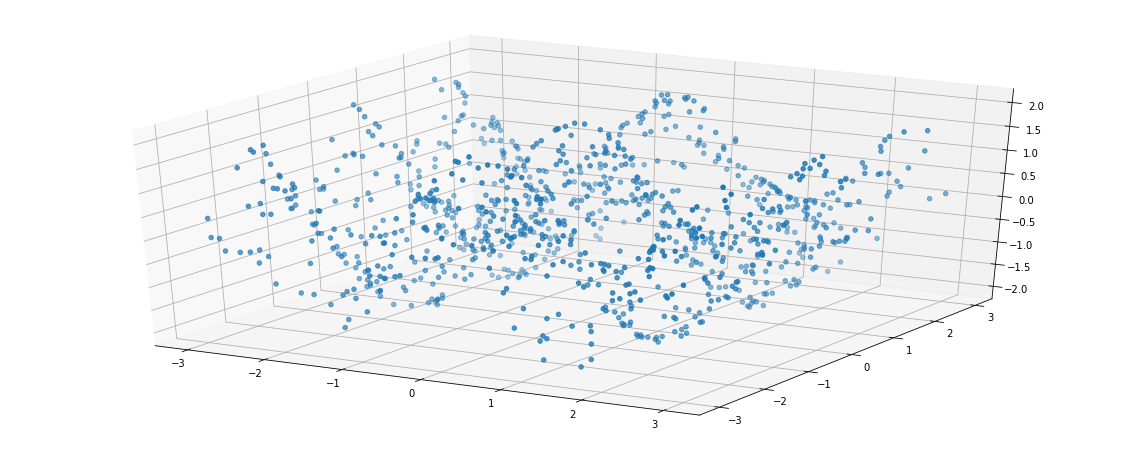

In [ ]:
# Plot it
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y);

In [ ]:
# SVR
model = SVR(C=100.)
model.fit(X, Y);

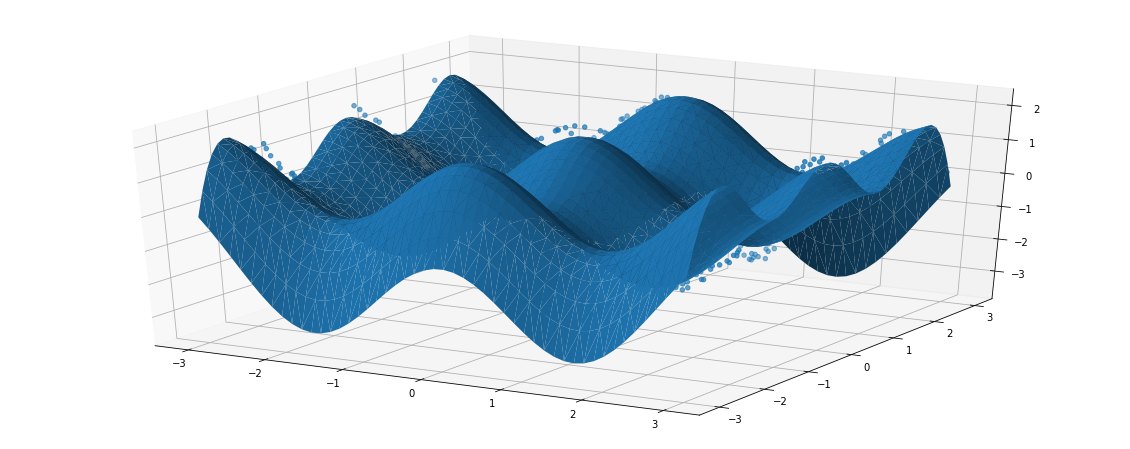

In [ ]:
# Plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True);

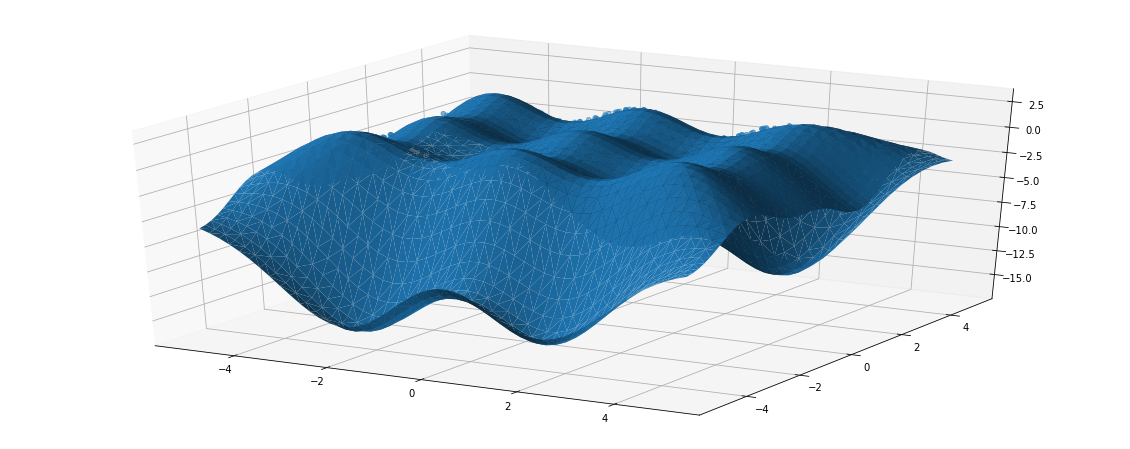

In [ ]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

Sometimes people ask: isn't that the true function?

NO! The true function is given above:

$$ y = \cos(2x_1) + cos(3x_2) $$

Don't forget it this time!

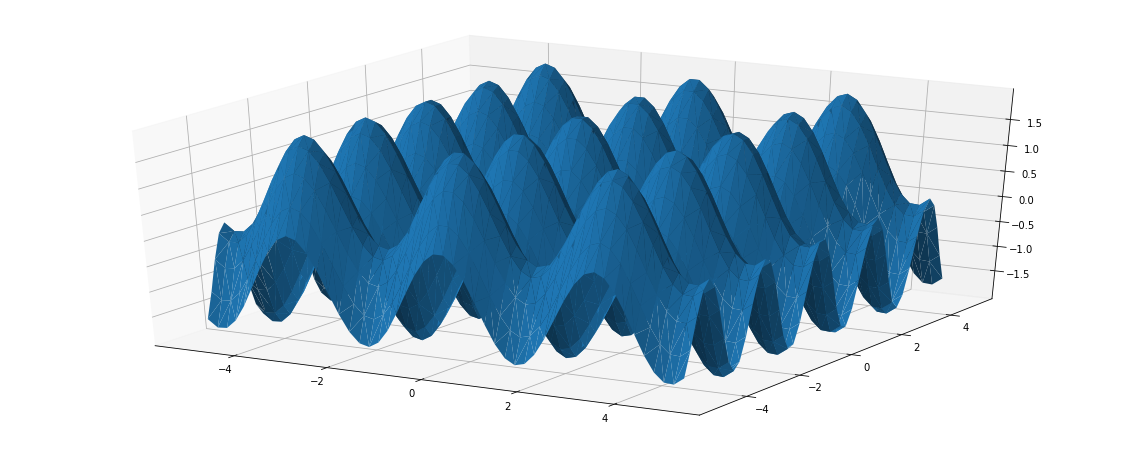

In [ ]:
# What the true function looks like
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Ytrue = np.cos(2*Xgrid[:,0]) + np.cos(3*Xgrid[:,1]) ### the true function
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Ytrue, linewidth=0.2, antialiased=True)
plt.show()

In [ ]:
model = RandomForestRegressor()
model.fit(X, Y);

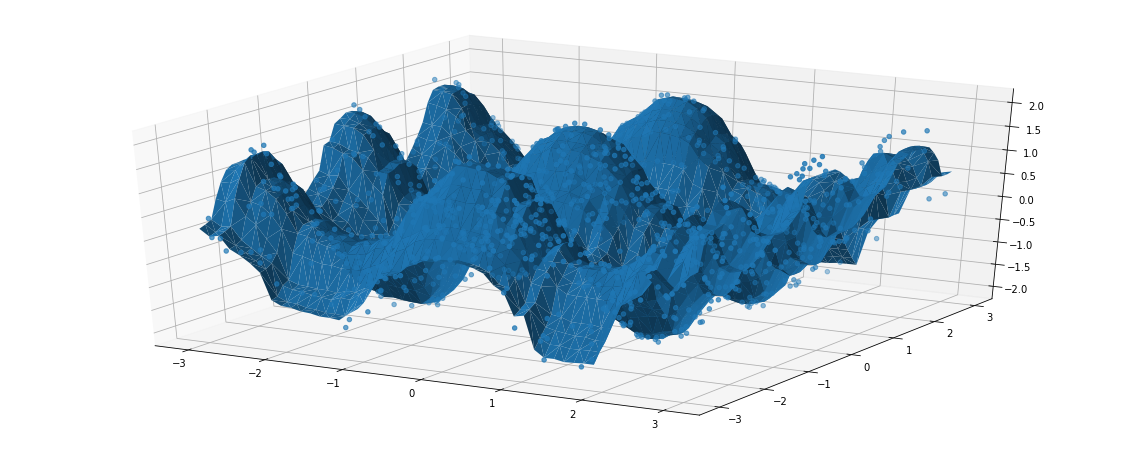

In [ ]:
# Plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True);

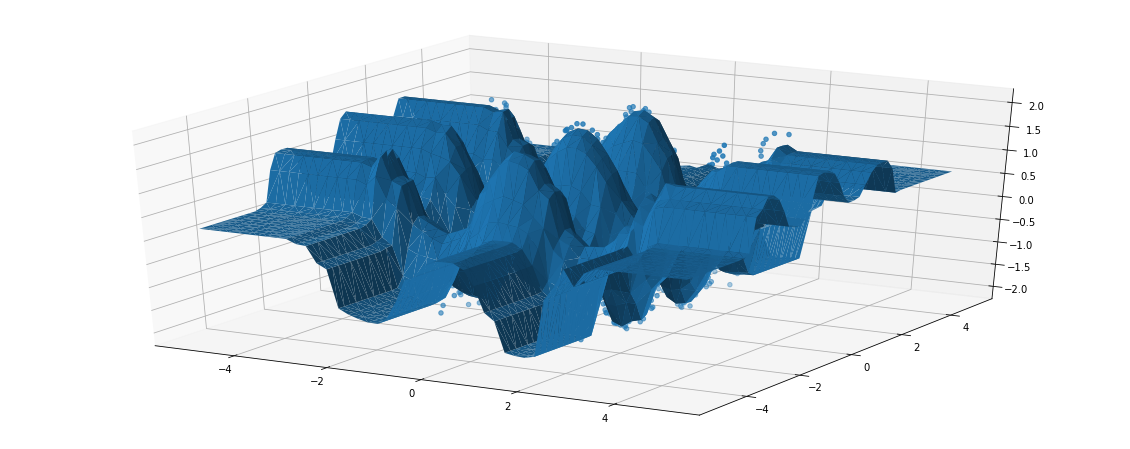

In [ ]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

In [ ]:
model = MLPRegressor(hidden_layer_sizes=128, alpha=0., learning_rate_init=0.01)
model.fit(X, Y);

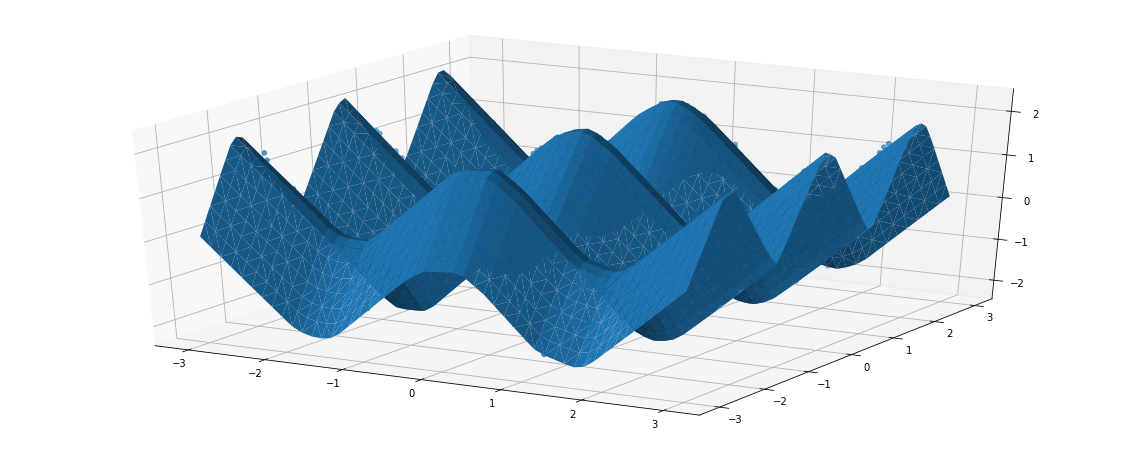

In [ ]:
# Plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True);

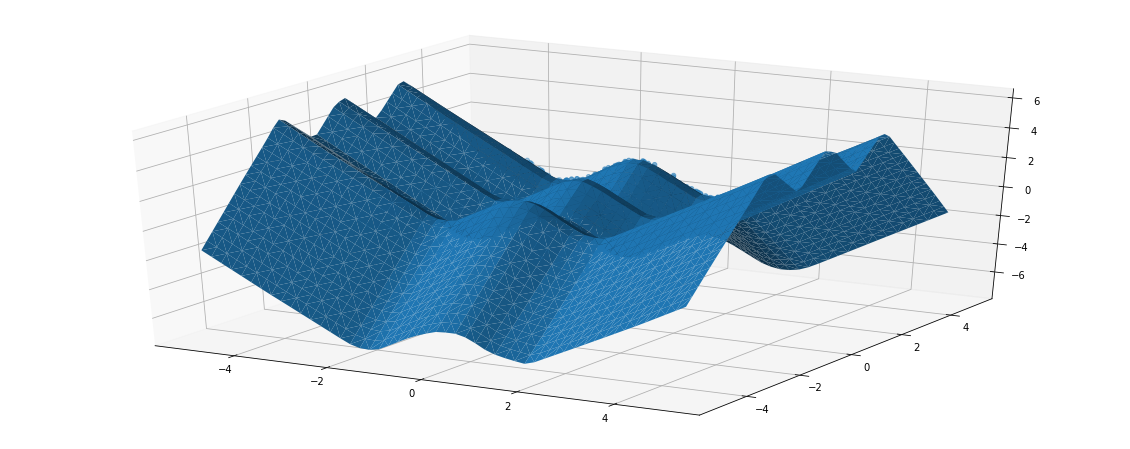

In [ ]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

## Stock Prices

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv

--2021-06-05 20:51:06--  https://lazyprogrammer.me/course_files/SPY.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251935 (246K) [text/csv]
Saving to: ‘SPY.csv’

SPY.csv             100%[===================>] 246.03K  1.19MB/s    in 0.2s    

2021-06-05 20:51:07 (1.19 MB/s) - ‘SPY.csv’ saved [251935/251935]



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('SPY.csv', index_col='Date', parse_dates=True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [ ]:
df.shape

(2263, 6)

In [ ]:
train = df.iloc[:2000]['Close'].to_numpy()
test = df.iloc[2000:]['Close'].to_numpy()

In [ ]:
Xtrain = []
for t in range(len(train) - 1):
  x0 = train[t]
  x1 = train[t + 1]
  Xtrain.append((x0, x1))

Xtest = []
for t in range(len(test) - 1):
  x0 = test[t]
  x1 = test[t + 1]
  Xtest.append((x0, x1))

In [ ]:
Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)

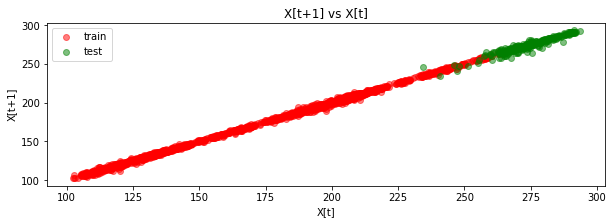

In [ ]:
plt.figure(figsize=(10, 3))
plt.xlabel("X[t]")
plt.ylabel("X[t+1]")
plt.title("X[t+1] vs X[t]")
plt.scatter(Xtrain[:,0], Xtrain[:,1], c='r', alpha=0.5, label='train')
plt.scatter(Xtest[:,0], Xtest[:,1], c='g', alpha=0.5, label='test')
plt.legend();

In [ ]:
# Exericse: if you believe that "min-max scaling" will help, try it
# (though it should be obvious why it yields the same result)